In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_boston

In [2]:
from sklearn.preprocessing import StandardScaler

In [4]:
boston = load_boston()
df = pd.DataFrame(boston['data'],columns=boston['feature_names'])
df['target'] = boston['target']

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [5]:
scaler = StandardScaler()
scaler.fit(df.values[:, :-1])
df.values[:, :-1] = scaler.transform(df.values[:, :-1]).round(4)

In [6]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
501,-0.4132,-0.4877,0.1157,-0.2726,0.1581,0.4393,0.0187,-0.6258,-0.9828,-0.8032,1.1765,0.3872,-0.4181,22.4
502,-0.4152,-0.4877,0.1157,-0.2726,0.1581,-0.2345,0.2889,-0.7166,-0.9828,-0.8032,1.1765,0.4411,-0.5008,20.6
503,-0.4134,-0.4877,0.1157,-0.2726,0.1581,0.9850,0.7974,-0.7737,-0.9828,-0.8032,1.1765,0.4411,-0.9830,23.9
504,-0.4078,-0.4877,0.1157,-0.2726,0.1581,0.7257,0.7370,-0.6684,-0.9828,-0.8032,1.1765,0.4032,-0.8653,22.0
505,-0.4150,-0.4877,0.1157,-0.2726,0.1581,-0.3628,0.4347,-0.6132,-0.9828,-0.8032,1.1765,0.4411,-0.6691,11.9


In [7]:
data = torch.from_numpy(df.values).float()
X = data[:, :-1]
y = data[:, -1:]

In [8]:
n_epochs = 200000
learning_rate = 1e-4
print_interval = 10000

In [13]:
class MyModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        self.input_dim = input_dim
        self.output_dim = output_dim
        super().__init__()

        self.linear1 = nn.Linear(input_dim, 3)
        self.linear2 = nn.Linear(3, 3)
        self.linear3 = nn.Linear(3, 3)
        self.linear4 = nn.Linear(3, output_dim)
        self.act = nn.LeakyReLU()
    
    def forward(self, X):
        h = self.act(self.linear1(X))
        h = self.act(self.linear2(h))
        h = self.act(self.linear3(h))
        y = self.linear4(h)
        return y

In [14]:
model = MyModel(X.size(-1), y.size(-1))
print(model)

MyModel(
  (linear1): Linear(in_features=13, out_features=3, bias=True)
  (linear2): Linear(in_features=3, out_features=3, bias=True)
  (linear3): Linear(in_features=3, out_features=3, bias=True)
  (linear4): Linear(in_features=3, out_features=1, bias=True)
  (act): LeakyReLU(negative_slope=0.01)
)


In [15]:
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [17]:
for i in range(n_epochs):
    y_hat = model(X)
    loss = F.mse_loss(y_hat, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i + 1) % print_interval == 0:
        print(f'Epoch {i + 1}: loss:{loss:.4e}')

Epoch 10000: loss:1.2042e+01
Epoch 20000: loss:1.1410e+01
Epoch 30000: loss:1.0717e+01
Epoch 40000: loss:1.0398e+01
Epoch 50000: loss:1.0230e+01
Epoch 60000: loss:1.0075e+01
Epoch 70000: loss:9.7773e+00
Epoch 80000: loss:9.1316e+00
Epoch 90000: loss:8.2706e+00
Epoch 100000: loss:7.7788e+00
Epoch 110000: loss:7.5277e+00
Epoch 120000: loss:7.3914e+00
Epoch 130000: loss:7.3362e+00
Epoch 140000: loss:7.3155e+00
Epoch 150000: loss:7.2843e+00
Epoch 160000: loss:7.2417e+00
Epoch 170000: loss:7.1940e+00
Epoch 180000: loss:7.1805e+00
Epoch 190000: loss:7.1287e+00
Epoch 200000: loss:7.0483e+00


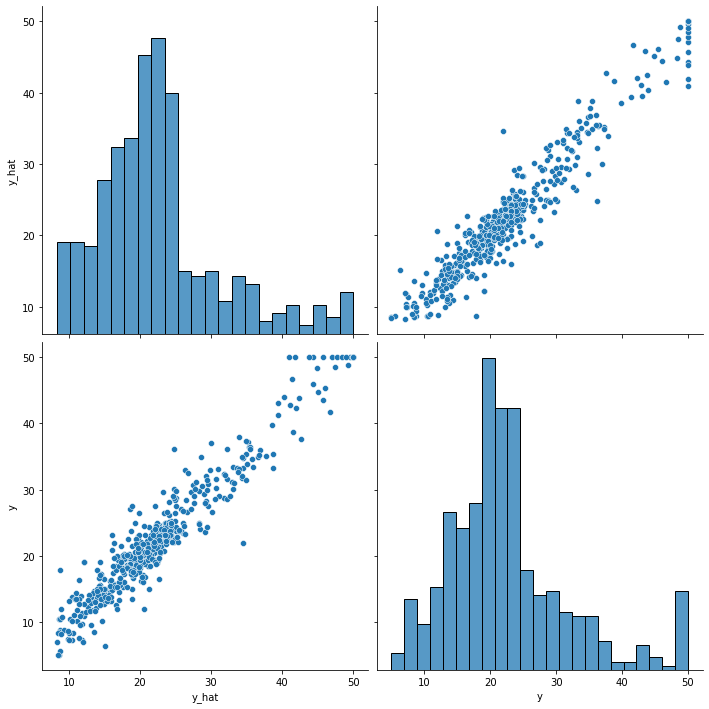

In [19]:
df = (pd.DataFrame(torch.concat([y_hat, y], dim=1).detach().numpy(), columns=['y_hat', 'y'])
      .assign(y_hat=lambda df: df.y_hat.clip(upper=50))
)
sns.pairplot(df, height=5)
plt.show()